# Chapter 10 - Boosting and Additive Trees

### 10.1 - Boosting Methods

* The motivation for boosting -- a procedure that combines the outputs of many “weak” classifiers to produce a powerful “committee.
* A weak classifier is one whose error rate is only slightly better than random guessing. The purpose of boosting is to sequentially apply the weak classification algorithm to repeatedly modified versions of the data, thereby producing a sequence of weak classifiers. The predictions from all of the weak classifiers are then combined through a weighted majority vote, producing a final prediction.
* The data modifications at each boosting step consist of applying weights to each of the training observation (initially everything is weighted equally).
*  At step m, those observations that were misclassified by the classifier induced at the previous step have their weights increased, whereas the weights are decreased for those that were classified correctly. Thus as iterations proceed, observations that are difficult to classify correctly receive ever-increasing influence, forcing it to concentrate on those training observations that are missed by previous ones in the sequence.

### 10.2 - Boosting Fits and Additive Model

* Boosting is a way of fitting an additive expansion in a set of elementary “basis” functions. Here the basis functions are the individual classifiers.

### 10.3 - Forward Stagewise Additive Modeling

* Forward stagewise modeling approximates the solution by sequentially adding new basis functions to the expansion, without adjusting the parameters and coefficients of those that have already been added. 

### 10.4 - Exponential Loss and Adaboost

* Adaboost is equivalent to forward stagewise additive modeling with loss function $exp(-y f(x))$.
* For Adaboost, the basis functions are the individual classifiers.

### 10.5 - Why Exponential Loss?

* Its equivalence to forward stagewise additive modeling based on exponential loss was only discovered five years after its inception. 
* The principal attraction of exponential loss in the context of additive modeling is computational; it leads to the simple modular reweighting AdaBoost algorithm. 
* The additive expansion produced by AdaBoost is estimating one-half the log-odds of P (Y = 1|x). 

### 10.6 - Loss Functions and Robustness

* Robustness = resistance to outliers.
* **margin** is $yf(x)$ and is similar to a residual when the response for classification is 1/-1. 
* If margin < 0 we have misclassified, if > 0 we have correctly classified. The goal of the classification algorithm is to produce positive margins as frequently as possible.
* Any loss criterion used for classification should penalize negative margins more heavily than positive ones since positive margin observations are already correctly classified.
* Misclassification loss gives unit penalty for negative margin values, and no penalty at all for positive ones. 
* Both the exponential and deviance loss can be viewed as monotone continuous approximations (i.e. differentiable) to misclassification loss. 
* Exponential criterion concentrates much more influence on observations with large negative margins. 
* Binomial deviance concentrates relatively less influence on such observations, more evenly spreading the influence among all of the data.
* Squared-error loss is not a good surrogate for misclassification error. 
* Squared-error loss places much more emphasis on observations with large absolute residuals during the fitting process. It is thus far less robust, and its performance severely degrades for long-tailed error distributions and especially for grossly mismeasured y-values (“outliers”). 
* Other more robust criteria, such as absolute loss, perform much better in these situations (however this can be difficult to optimize mathematically).
* Other loss functions (such as Huber) have been created that are much more outlier resistant.

### 10.7 - “Off-the-Shelf” Procedures for Data Mining

* Data is usually messy: the inputs tend to be mixtures of quantitative, binary, and categorical variables, the latter often with many levels. There are generally many missing values, complete observations being rare. Distributions of numeric predictor and response variables are often long-tailed and highly skewed.
* Requirements of speed, interpretability, and the messy nature of the data sharply limit the usefulness of most learning procedures as off-the-shelf methods for data mining. 
* An “off-the-shelf” method is one that can be directly applied to the data without requiring a great deal of time - consuming data preprocessing or careful tuning of the learning procedure.
* Of all the well-known learning methods, decision trees come closest to meeting the requirements for serving as an off-the-shelf procedure for data mining.
* Trees have one aspect that prevents them from being the ideal tool for predictive learning, namely inaccuracy. They seldom provide predictive accuracy comparable to the best that can be achieved with the data at hand. 
* Boosting decision trees improves their accuracy, often dramatically. 

### 10.8 - Example:  Spam Data

* Boosting outperforms (w.r.t. test error) additive logistic regression, CART, and MARS on the spam example.

### 10.9 - Boosting Trees

* A formal mathematical definition of trees is given in this section.
* Finding the optimal tree is a difficult optimization problem. So we approximate by doing the following:
    * The terminal prediction in each region is just the average of observations.
    * Determining the region partitioning is done by a top-down greedy algorithm (the tree partitioning algorithm discussed in previous sections)
* Boosted tree model is a sum of these trees. Closed form optimization of this is also nearly impossible. For a few special cases the formula simplifies:
    * For squared-errored loss each tree predicts the residuals of the cumulative prediction from the prior step.
    * For exponential loss we get the Adabost algorithm.
    * Using loss criteria such as the absolute error or the Huber loss in place of squared-error loss for regression, and the deviance in place of exponential loss for classification, will serve to robustify boosting trees. Unfortunately, unlike their non-robust counterparts, these robust criteria do not give rise to simple fast boosting algorithms.

### 10.10 - Numerical Optimization via Gradient Boosting

* Fortunately, numerical approximation algorithms can be used to fit boosted trees for any differentiable loss function.
* Steepest descent uses a step that is a scalar multiple of the negative gradient of the loss function (goes "downhill"). This is a greedy strategy that can find local minima instead of global minima.
* Forward stagewise boosting is a greedy strategy. This is the common strategy of fitting to the residual of the current model at each step.

### 10.11 - Right Size Tree For Boosting

* Historically assumed each tree was a primitive building block. This resulted in early trees that grow much too deep.
* Simple strategy to avoid this is to restrict the algorithm so trees are always the same size (possibly allowing the final tree to be bigger).
* Given depth $J$, the interaction level of tree-based approximations is limited by the tree size $J$. Namely, no interaction effects of level greater that $J − 1$ are possible.
* $J$ should reflect the level of dominant interactions (which is unknown).
* It is unlikely that $J > 10$ will be required. Experience so far indicates that $4 ≤ J ≤ 8$ works well in the context of boosting, with results being fairly insensitive to particular choices in this range. One can fine-tune the value for $J$ by trying several different values and choosing the one that produces the lowest risk on a validation sample. However, this seldom provides significant improvement over using $J ≃ 6$.
* Also must estimate $M$, the number of boosting rounds. With early stopping, we can monitor the validation error to make sure we stop when overfit begins.

### 10.12 - Regularization

* We can control the learning rate of the trees as well by weighting its contribution to the sum.
* In fact, the best strategy appears to be to set $ν$ (learning rate) to be very small ($ν$ < 0.1) and then choose M by early stopping. 
* Another tuning parameter is to subsample the training data at each step. This makes the computation faster and can create a more robust model.

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# load our toy data set
data, target = load_boston(True)
X_train, X_test, y_train, y_test = train_test_split(data, target)

# LightGBM requires Dataset objects to be constructed
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

# Hyper-parameters and settings
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l2',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Fit the model with early stopping (monitors test set)
gbm = lgb.train(params, lgb_train, valid_sets=lgb_eval, num_boost_round=1000, early_stopping_rounds=5)
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

[1]	valid_0's l2: 69.8949
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 64.9347
[3]	valid_0's l2: 60.7169
[4]	valid_0's l2: 57.0476
[5]	valid_0's l2: 53.761
[6]	valid_0's l2: 50.6526
[7]	valid_0's l2: 47.8761
[8]	valid_0's l2: 44.8271
[9]	valid_0's l2: 42.5575
[10]	valid_0's l2: 40.5298
[11]	valid_0's l2: 38.6983
[12]	valid_0's l2: 36.8774
[13]	valid_0's l2: 35.2458
[14]	valid_0's l2: 33.6119
[15]	valid_0's l2: 32.1138
[16]	valid_0's l2: 31.0234
[17]	valid_0's l2: 29.9245
[18]	valid_0's l2: 28.9536
[19]	valid_0's l2: 28.1513
[20]	valid_0's l2: 27.0796
[21]	valid_0's l2: 26.316
[22]	valid_0's l2: 25.4827
[23]	valid_0's l2: 24.7447
[24]	valid_0's l2: 23.9091
[25]	valid_0's l2: 23.3001
[26]	valid_0's l2: 22.736
[27]	valid_0's l2: 22.0815
[28]	valid_0's l2: 21.6397
[29]	valid_0's l2: 21.292
[30]	valid_0's l2: 20.9276
[31]	valid_0's l2: 20.4857
[32]	valid_0's l2: 19.9552
[33]	valid_0's l2: 19.6219
[34]	valid_0's l2: 19.1699
[35]	valid_0's l2: 18.8628
[36]	val

### 10.13 - Interpretation

* While decisions trees are highly interpretable (you can draw the chart), boosted trees are not so much.
* Variable importance - one way to do this is to sum over the trees the squared-error improvement contributed by each variable in an internal node split.
* Partial-dependence plot - attempt to understand the nature of the dependence of the approximation $f(X)$ on the most relevant variables joint values.

,Importance Score,Feature Name
0,186,Column_5
1,178,Column_12
2,134,Column_7
3,126,Column_0
4,98,Column_6
5,98,Column_4
6,78,Column_11
7,71,Column_10
8,65,Column_9
9,49,Column_2


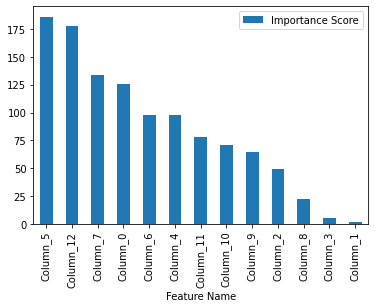

In [2]:
import pandas
%matplotlib inline

importances = gbm.feature_importance()
df_importance = pandas.DataFrame(sorted(zip(importances, gbm.feature_name()),
                                       reverse=True), 
columns = ['Importance Score', 'Feature Name'])
    
df_importance.plot.bar(x='Feature Name', y= 'Importance Score')
df_importance

### 10.14 - Illustrations

* The choice of a particular value of M is not critical, as long as it is not too small. This tends to be the case in many applications. The shrinkage strategy tends to eliminate the problem of overfitting, especially for larger data sets.
* Because of their ability to model interactions and automatically select variables, as well as robustness to outliers and missing data, GBM models are rapidly gaining popularity.